In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tickers = [ 'GLD', 'BOTZ', 'BTC-USD', 'MXI', 'SPY', 'TNXP', 'UCC', 'VMI', '^VIX']
prices = yf.download(tickers, start = '2015-01-01', end = '2025-08-30', auto_adjust = False, multi_level_index = False)['Adj Close']
prices.head()

[*********************100%***********************]  9 of 9 completed


Ticker,BOTZ,BTC-USD,GLD,MXI,SPY,TNXP,UCC,VMI,^VIX
Date,,,,,,,,,
2015-01-01,NaN,314.248993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,315.032013,114.080002,41.985668,171.568039,3.788800e+09,11.943199,113.824440,17.790001
2015-01-03,NaN,281.082001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,264.195007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,274.473999,115.800003,40.878994,168.469559,3.744000e+09,11.483612,111.999962,19.920000


In [3]:
daily_returns = np.log(prices).diff().dropna()

<Axes: xlabel='Date'>

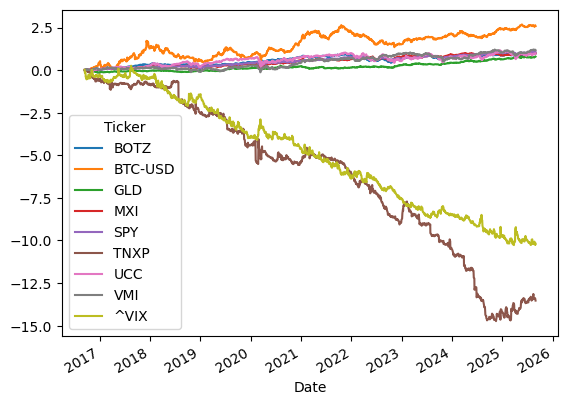

In [4]:
daily_returns.cumsum().plot()

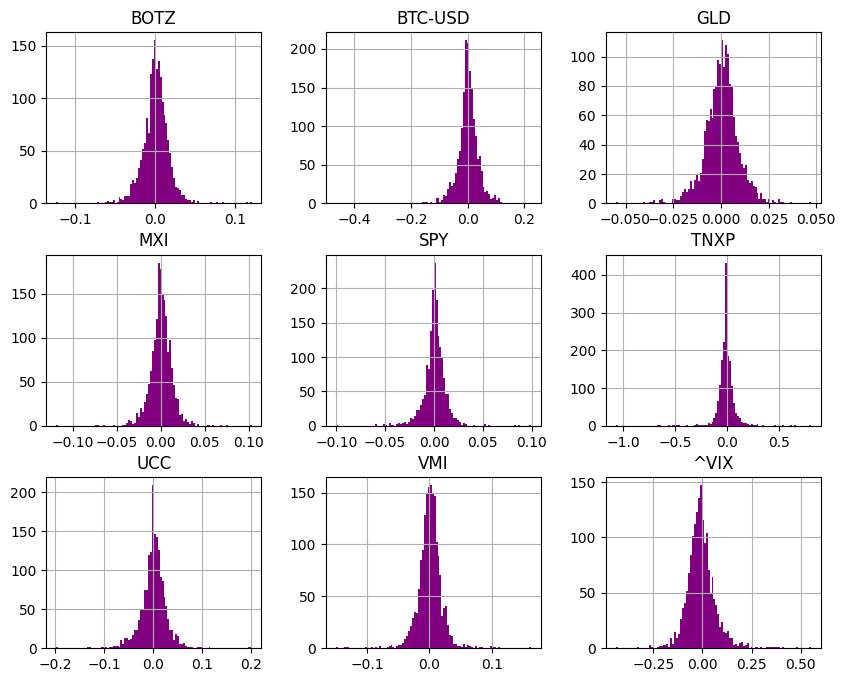

In [9]:
daily_returns.hist(bins = 100, color = 'purple', figsize = (10,8))
plt.show()

In [5]:
stat_df = pd.DataFrame()
stat_df.index = tickers
stat_df['Kurtosis'] = daily_returns.kurtosis()
stat_df['Skewness'] = daily_returns.skew()
stat_df['Mean'] = daily_returns.mean() * 252
stat_df['Std'] = daily_returns.std() * np.sqrt(252)
stat_df

,Kurtosis,Skewness,Mean,Std
GLD,2.805564,-0.265491,0.113356,0.140966
BOTZ,6.479081,0.073401,0.138858,0.255549
BTC-USD,14.546048,-0.910702,0.369578,0.619737
MXI,9.903442,-0.267541,0.142548,0.203051
SPY,12.550336,-0.075226,0.153151,0.182261
TNXP,29.429791,-1.094198,-1.935504,1.383939
UCC,8.648781,-0.395570,0.137974,0.417215
VMI,10.959046,-0.220554,0.168144,0.314786
^VIX,6.427769,1.035751,-1.457278,1.199117


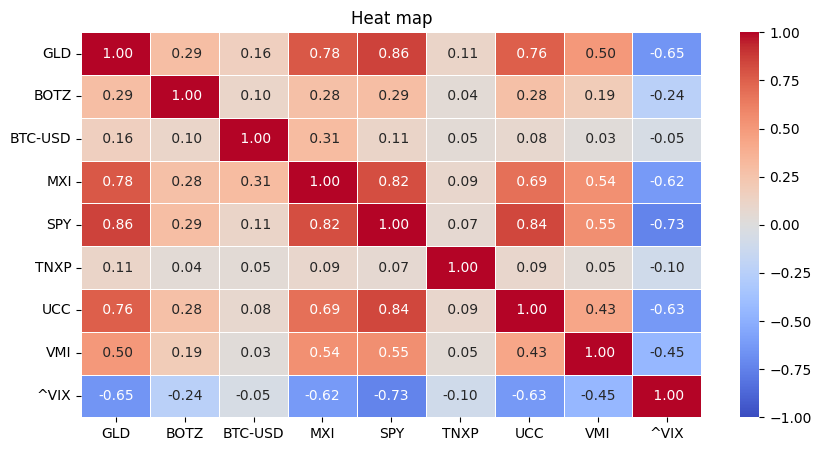

In [6]:
heat_map = daily_returns.corr().to_numpy()
plt.figure(figsize = (10,5))
sns.heatmap(heat_map, linewidths = 0.5, cmap = 'coolwarm', xticklabels = tickers, yticklabels = tickers, vmin = -1, vmax = 1, annot = True, fmt = " .2f")
plt.title("Heat map")
plt.show()